In [50]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Load the data
df = pd.read_csv(r'E:\ML projects\AutomobileLoanDefaultPrediction\notebooks\data\autodata.csv')



In [52]:
# Head of the data
print(df.head())

         ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes        

In [53]:
#Data types
print(df.dtypes)

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [54]:
# data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [55]:
# Check for missing values
print(df.isnull().sum())

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [56]:
# Summary statistics
print(df.describe())

                 ID      Car_Owned     Bike_Owned    Active_Loan  \
count  1.218560e+05  118275.000000  118232.000000  118221.000000   
mean   1.216093e+07       0.342854       0.332262       0.499175   
std    3.517694e+04       0.474665       0.471026       0.500001   
min    1.210000e+07       0.000000       0.000000       0.000000   
25%    1.213046e+07       0.000000       0.000000       0.000000   
50%    1.216093e+07       0.000000       0.000000       0.000000   
75%    1.219139e+07       1.000000       1.000000       1.000000   
max    1.222186e+07       1.000000       1.000000       1.000000   

           House_Own    Child_Count  Own_House_Age     Mobile_Tag  \
count  118195.000000  118218.000000   41761.000000  121856.000000   
mean        0.692060       0.417779      12.157324       0.999992   
std         0.461644       0.728802      12.056079       0.002865   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       

In [57]:
#print the na count
nan_counts = df.isna().sum()
print(nan_counts)

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [58]:
# check shape of the data
print(df.shape)

(121856, 40)


The data has too many missing values

***Data Preprocessing and EDA***

In [59]:
#check all the distinguished features of the dataset
df.select_dtypes(include='object').nunique()

Client_Income                  1516
Credit_Amount                  6816
Loan_Annuity                  16680
Accompany_Client                  7
Client_Income_Type                8
Client_Education                  5
Client_Marital_Status             4
Client_Gender                     3
Loan_Contract_Type                2
Client_Housing_Type               6
Population_Region_Relative      164
Age_Days                      22583
Employed_Days                 13220
Registration_Days             19254
ID_Days                        9655
Client_Occupation                18
Client_Permanent_Match_Tag        2
Client_Contact_Work_Tag           2
Type_Organization                58
Score_Source_3                 1430
dtype: int64

In [60]:
#remove the ID column as we dont need it in the train dataset
df.drop(columns = ['ID', 'ID_Days'], inplace=True)

In [61]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count',
       'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')


In [62]:
df.select_dtypes(include=['int64', 'float64']).nunique()

Car_Owned                       2
Bike_Owned                      2
Active_Loan                     2
House_Own                       2
Child_Count                    14
Own_House_Age                  55
Mobile_Tag                      2
Homephone_Tag                   2
Workphone_Working               2
Client_Family_Members          15
Cleint_City_Rating              3
Application_Process_Day         7
Application_Process_Hour       24
Score_Source_1              43968
Score_Source_2              67016
Social_Circle_Default        1882
Phone_Change                 3590
Credit_Bureau                  21
Default                         2
dtype: int64

In [63]:
object_columns = df.select_dtypes(include=['object'])
print(object_columns.columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'Client_Occupation', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_3'],
      dtype='object')


In [64]:
# Change numerical column datatypes from object to int and remove string data

# Clean and convert 'Client_Income' column to numeric
df['Client_Income'] = df['Client_Income'].str.replace('[^0-9.]', '', regex=True)
df['Client_Income'] = pd.to_numeric(df['Client_Income'], errors='coerce')

# Clean and convert 'Credit_Amount' column to numeric
df['Credit_Amount'] = df['Credit_Amount'].str.replace('[^0-9.]', '', regex=True)
df['Credit_Amount'] = pd.to_numeric(df['Credit_Amount'], errors='coerce')

# Clean and convert 'Loan_Annuity' column to numeric
df['Loan_Annuity'] = df['Loan_Annuity'].str.replace('[^0-9.]', '', regex=True)
df['Loan_Annuity'] = pd.to_numeric(df['Loan_Annuity'], errors='coerce')

# Clean and convert 'Population_Region_Relative' column to numeric
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.replace('[^0-9.]', '', regex=True)
df['Population_Region_Relative'] = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')

# Clean and convert 'Age_Days' column to numeric
df['Age_Days'] = df['Age_Days'].str.replace('[^0-9.]', '', regex=True)
df['Age_Days'] = pd.to_numeric(df['Age_Days'], errors='coerce')

# Clean and convert 'Employed_Days' column to numeric
df['Employed_Days'] = df['Employed_Days'].str.replace('[^0-9.]', '', regex=True)
df['Employed_Days'] = pd.to_numeric(df['Employed_Days'], errors='coerce')

# Clean and convert 'Registration_Days' column to numeric
df['Registration_Days'] = df['Registration_Days'].str.replace('[^0-9.]', '', regex=True)
df['Registration_Days'] = pd.to_numeric(df['Registration_Days'], errors='coerce')

# Clean and convert 'Score_Source_3' column to numeric
df['Score_Source_3'] = df['Score_Source_3'].str.replace('[^0-9.]', '', regex=True)
df['Score_Source_3'] = pd.to_numeric(df['Score_Source_3'], errors='coerce')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               102336 non-null  float64
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               38718 non-null   float64
 7   Loan_Annuity                94358 non-null   float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [66]:
#checking the unique values and distribution in the client occupation column
unique_occupations = df['Client_Occupation'].unique()
print(unique_occupations)

['Sales' nan 'Realty agents' 'Laborers' 'Core' 'Drivers' 'Managers'
 'Accountants' 'High skill tech' 'Cleaning' 'HR' 'Waiters/barmen'
 'Low-skill Laborers' 'Medicine' 'Cooking' 'Private service' 'Security'
 'IT' 'Secretaries']


In [67]:
occupation_counts = df['Client_Occupation'].value_counts()
print(occupation_counts)

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


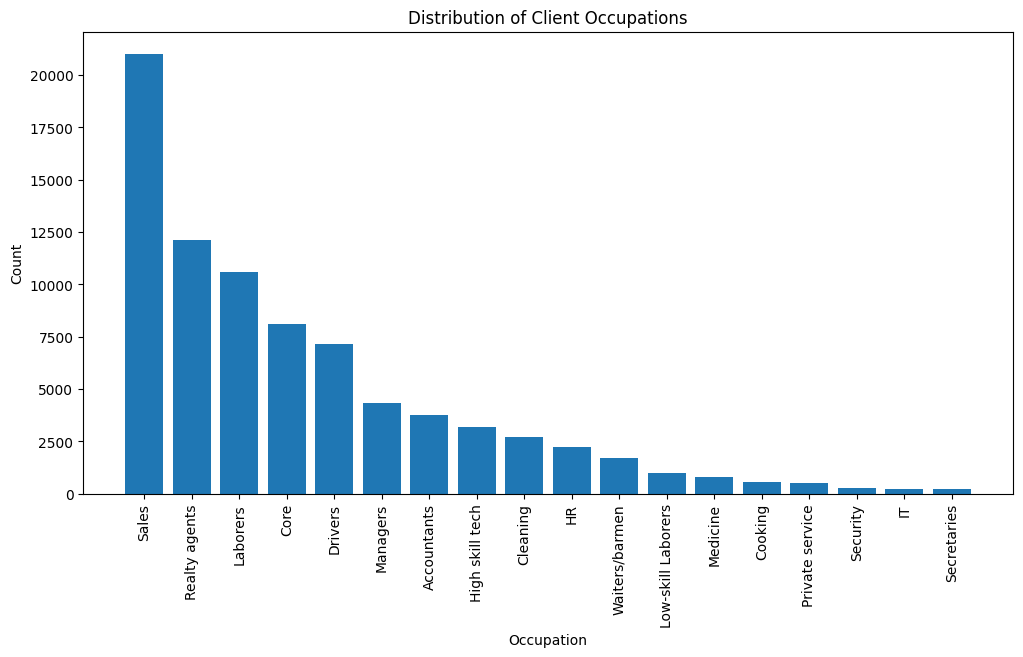

In [68]:
# Filter out missing values (NaN) in the 'Client_Occupation' column
filtered_df = df[df['Client_Occupation'].notna()]

# Data
unique_occupations = filtered_df['Client_Occupation'].unique()
occupation_counts = filtered_df['Client_Occupation'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(unique_occupations, occupation_counts)

# Set labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Distribution of Client Occupations')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [69]:
# Define a function to map occupations to new categories
def map_occupation(category):
    if pd.isna(category):
        return 'Unknown'
    elif category in ['Sales', 'Realty agents', 'Managers', 'Accountants', 'High skill tech', 'IT']:
        return 'Professional'
    elif category in ['Laborers', 'Core', 'Drivers', 'Cleaning', 'Low-skill Laborers']:
        return 'Skilled Labor'
    elif category in ['HR', 'Waiters/barmen', 'Cooking', 'Private service', 'Security', 'Secretaries']:
        return 'Service'
    elif category == 'Medicine':
        return 'Healthcare'
    else:
        return 'Other'

# Apply the function to the 'Client_Occupation' column and create a new 'Occupation_Category' column
df['Client_Occupation'] = df['Client_Occupation'].apply(map_occupation)

<Axes: xlabel='Client_Occupation'>

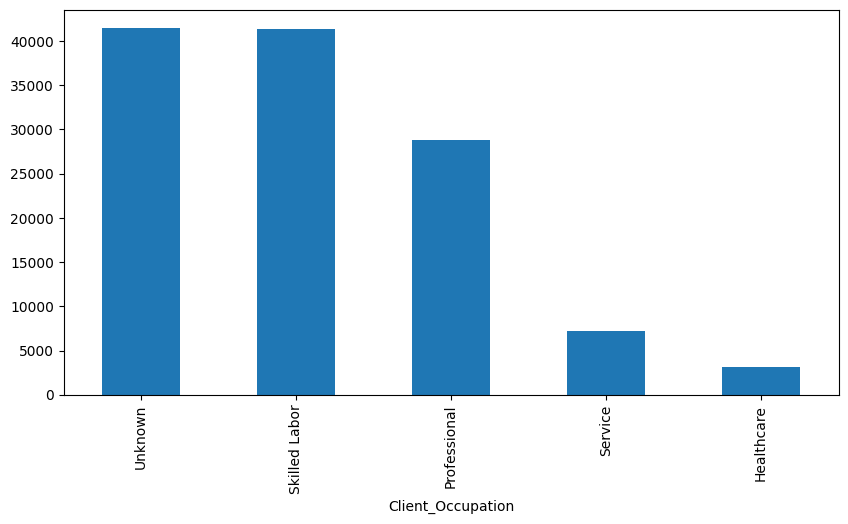

In [70]:
plt.figure(figsize=(10,5))
df['Client_Occupation'].value_counts().plot(kind='bar')

Do the same for the client organization type

In [71]:
#checking the unique values and distribution in the client occupation column
unique_organizations = df['Type_Organization'].unique()
print(unique_organizations)

['Self-employed' 'Government' 'XNA' 'Business Entity Type 3' 'Other' nan
 'Industry: type 3' 'Business Entity Type 2' 'Business Entity Type 1'
 'Transport: type 4' 'Construction' 'Kindergarten' 'Trade: type 3'
 'Industry: type 2' 'Trade: type 7' 'Trade: type 2' 'Agriculture'
 'Military' 'Medicine' 'Housing' 'Industry: type 1' 'Industry: type 11'
 'Bank' 'School' 'Industry: type 9' 'Postal' 'University'
 'Transport: type 2' 'Restaurant' 'Electricity' 'Police'
 'Industry: type 4' 'Security Ministries' 'Services' 'Transport: type 3'
 'Mobile' 'Hotel' 'Security' 'Industry: type 7' 'Advertising' 'Cleaning'
 'Realtor' 'Trade: type 6' 'Culture' 'Industry: type 5' 'Telecom'
 'Trade: type 1' 'Industry: type 12' 'Industry: type 8' 'Insurance'
 'Emergency' 'Legal Services' 'Industry: type 10' 'Trade: type 4'
 'Industry: type 6' 'Transport: type 1' 'Industry: type 13' 'Religion'
 'Trade: type 5']


In [72]:
# Define a function to map organization types to new categories
def map_organization(category):
    if pd.isna(category):
        return 'Unknown'
    elif category == 'XNA':
        return 'Unknown'
    elif category in ['Self-employed', 'Government']:
        return 'Public Sector'
    elif category in ['Business Entity Type 3', 'Business Entity Type 2', 'Business Entity Type 1', 'Construction']:
        return 'Business'
    elif category in ['Trade: type 3', 'Trade: type 7', 'Trade: type 2', 'Agriculture']:
        return 'Trade'
    elif category in ['Military', 'Medicine', 'Housing', 'Industry: type 1', 'Industry: type 11', 'Bank', 'School', 'Industry: type 9', 'Postal', 'University']:
        return 'Institution'
    elif category in ['Transport: type 4', 'Transport: type 2', 'Transport: type 3', 'Transport: type 1']:
        return 'Transport'
    else:
        return 'Other'

# Apply the function to the 'Type_Organization' column
df['Type_Organization'] = df['Type_Organization'].apply(map_organization)

<Axes: xlabel='Type_Organization'>

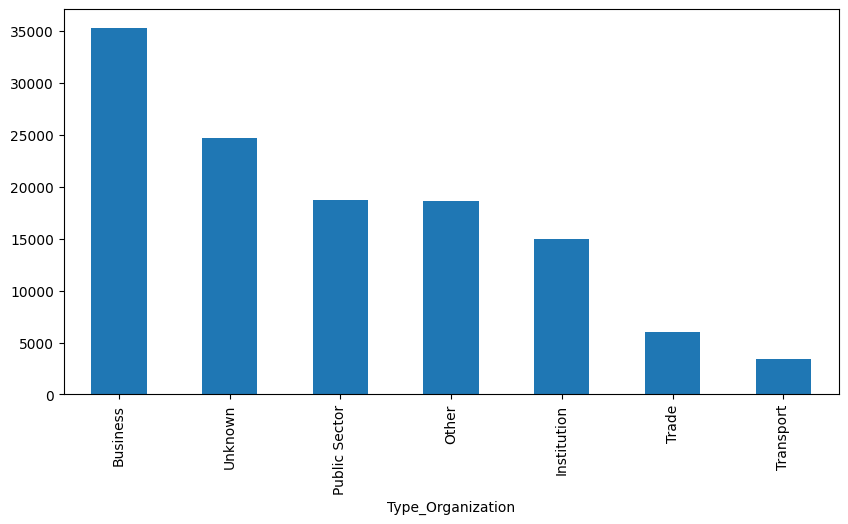

In [73]:
plt.figure(figsize=(10,5))
df['Type_Organization'].value_counts().plot(kind='bar')

In [74]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,Commercial,...,Yes,Yes,Public Sector,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,Service,...,Yes,Yes,Public Sector,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,Service,...,Yes,Yes,Public Sector,NaN,0.552795,NaN,0.0742,277.0,0.0,0
3,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,Retired,...,Yes,Yes,Unknown,NaN,0.135182,NaN,NaN,1700.0,3.0,0
4,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,Commercial,...,Yes,Yes,Business,0.508199,0.301182,NaN,0.2021,674.0,1.0,0


In [75]:
#categorical columns
categorical_columns = ['Mobile_Tag', 'Homephone_Tag', 'Workphone_Working','Default','House_Own','Active_Loan','Bike_Owned','Car_Owned']

# Replace '1' with 'yes' and '0' with 'no' in each column
for col in categorical_columns:
    df[col] = df[col].replace({1: 'yes', 0: 'no'})

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 38 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               102336 non-null  float64
 1   Car_Owned                   118275 non-null  object 
 2   Bike_Owned                  118232 non-null  object 
 3   Active_Loan                 118221 non-null  object 
 4   House_Own                   118195 non-null  object 
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               38718 non-null   float64
 7   Loan_Annuity                94358 non-null   float64
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [77]:
df.shape

(121856, 38)

In [78]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,6750.0,no,no,yes,no,0.0,61190.55,3416.85,Alone,Commercial,...,Yes,Yes,Public Sector,0.568066,0.478787,NaN,0.0186,63.0,NaN,no
1,20250.0,yes,no,yes,NaN,0.0,15282.00,1826.55,Alone,Service,...,Yes,Yes,Public Sector,0.563360,0.215068,NaN,NaN,NaN,NaN,no
2,18000.0,no,no,yes,no,1.0,59527.35,2788.20,Alone,Service,...,Yes,Yes,Public Sector,NaN,0.552795,NaN,0.0742,277.0,0.0,no
3,15750.0,no,no,yes,yes,0.0,53870.40,2295.45,Alone,Retired,...,Yes,Yes,Unknown,NaN,0.135182,NaN,NaN,1700.0,3.0,no
4,33750.0,yes,no,yes,no,2.0,133988.40,3547.35,Alone,Commercial,...,Yes,Yes,Business,0.508199,0.301182,NaN,0.2021,674.0,1.0,no


In [79]:
#checking the unique values and distribution in the mobile tag column
mobile_Tag = df['Mobile_Tag'].unique()
print(mobile_Tag)

mobile_Tag_counts = df['Mobile_Tag'].value_counts()
print(mobile_Tag_counts)

['yes' 'no']
Mobile_Tag
yes    121855
no          1
Name: count, dtype: int64


In [80]:
#drop the mobile tag column
df.drop(columns = 'Mobile_Tag', inplace=True)
df.shape

(121856, 37)

In [81]:
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, 
                        keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", 
       missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                    column name  Total missing  Percent missing
0               Score_Source_3         109034         0.894777
1                Credit_Amount          83138         0.682264
2                Own_House_Age          80095         0.657292
3               Score_Source_1          68835         0.564888
4        Social_Circle_Default          61928         0.508206
5   Population_Region_Relative          43231         0.354771
6                 Loan_Annuity          27498         0.225660
7                Client_Income          19520         0.160189
8                Credit_Bureau          18540         0.152147
9                Employed_Days          10631         0.087242
10           Registration_Days          10589         0.086898
11                    Age_Days          10582         0.086840
12              Score_Source_2           5686         0.046662
13          Client_Income_Type           3701         0.030372
14         Client_Housing_

In [82]:
# Calculate the percentage of missing values for each column
percent_missing = (df.isnull().sum() / len(df)) * 100

# Create a list of columns to drop where missing values are greater than 20 percent
columns_to_drop = percent_missing[percent_missing > 20].index

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print("Columns with missing values greater than 20 percent have been dropped.")
print("Remaining columns:")
print(df.head())

Columns with missing values greater than 20 percent have been dropped.
Remaining columns:
   Client_Income Car_Owned Bike_Owned Active_Loan House_Own  Child_Count  \
0         6750.0        no         no         yes        no          0.0   
1        20250.0       yes         no         yes       NaN          0.0   
2        18000.0        no         no         yes        no          1.0   
3        15750.0        no         no         yes       yes          0.0   
4        33750.0       yes         no         yes        no          2.0   

  Accompany_Client Client_Income_Type    Client_Education  \
0            Alone         Commercial           Secondary   
1            Alone            Service          Graduation   
2            Alone            Service  Graduation dropout   
3            Alone            Retired           Secondary   
4            Alone         Commercial           Secondary   

  Client_Marital_Status  ... Cleint_City_Rating Application_Process_Day  \
0          

In [83]:

df.shape

(121856, 30)

In [84]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,...,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_2,Phone_Change,Credit_Bureau,Default
0,6750.0,no,no,yes,no,0.0,Alone,Commercial,Secondary,M,...,2.0,6.0,17.0,Yes,Yes,Public Sector,0.478787,63.0,NaN,no
1,20250.0,yes,no,yes,NaN,0.0,Alone,Service,Graduation,M,...,2.0,3.0,10.0,Yes,Yes,Public Sector,0.215068,NaN,NaN,no
2,18000.0,no,no,yes,no,1.0,Alone,Service,Graduation dropout,W,...,2.0,4.0,NaN,Yes,Yes,Public Sector,0.552795,277.0,0.0,no
3,15750.0,no,no,yes,yes,0.0,Alone,Retired,Secondary,M,...,3.0,2.0,15.0,Yes,Yes,Unknown,0.135182,1700.0,3.0,no
4,33750.0,yes,no,yes,no,2.0,Alone,Commercial,Secondary,M,...,1.0,3.0,NaN,Yes,Yes,Business,0.301182,674.0,1.0,no


In [85]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                 19520
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Age_Days                      10582
Employed_Days                 10631
Registration_Days             10589
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Client_Permanent_Match_Tag        0
Client_Contact_Work_Tag           0
Type_Organization                 0
Score_Source_2           

In [86]:
# Fill Client_Income, Employed_Days, Registration_Days, Age_Days and Credit_Bureau with median value
df['Age_Days'].fillna(df['Age_Days'].median(), inplace=True)
df['Client_Income'].fillna(df['Client_Income'].median(), inplace=True)
df['Credit_Bureau'].fillna(df['Credit_Bureau'].median(), inplace=True)
df['Employed_Days'].fillna(df['Employed_Days'].median(), inplace=True)
df['Registration_Days'].fillna(df['Registration_Days'].median(), inplace=True)

In [87]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                    0
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Age_Days                         0
Employed_Days                    0
Registration_Days                0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization                0
Score_Source_2                5686
Phone_Change    

In [88]:
#fill the missing values for the remaining categorical and numerical columns
categorical_columns = ['Client_Gender', 'Client_Education', 'Client_Marital_Status', 'Client_Housing_Type', 'Client_Income_Type', 'Accompany_Client', 'Client_Occupation', 'Type_Organization']
numerical_columns = ['Child_Count', 'Client_Family_Members']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   118275 non-null  object 
 2   Bike_Owned                  118232 non-null  object 
 3   Active_Loan                 118221 non-null  object 
 4   House_Own                   118195 non-null  object 
 5   Child_Count                 121856 non-null  float64
 6   Accompany_Client            121856 non-null  object 
 7   Client_Income_Type          121856 non-null  object 
 8   Client_Education            121856 non-null  object 
 9   Client_Marital_Status       121856 non-null  object 
 10  Client_Gender               121856 non-null  object 
 11  Loan_Contract_Type          118205 non-null  object 
 12  Client_Housing_Type         121856 non-null  object 
 13  Age_Days      

In [90]:
# Check for NaN values in the remaining DataFrame
nan_values = df.isna().sum()
print("NaN values in the remaining DataFrame:")
print(nan_values)

NaN values in the remaining DataFrame:
Client_Income                    0
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                      0
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Client_Gender                    0
Loan_Contract_Type            3651
Client_Housing_Type              0
Age_Days                         0
Employed_Days                    0
Registration_Days                0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members            0
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_Tag          0
Type_Organization                0
Score_Source_2                5686
Phone_Change    

In [91]:
categorical_columns = ['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type']
numerical_columns = ['Cleint_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2', 'Phone_Change']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               121856 non-null  float64
 1   Car_Owned                   121856 non-null  object 
 2   Bike_Owned                  121856 non-null  object 
 3   Active_Loan                 121856 non-null  object 
 4   House_Own                   121856 non-null  object 
 5   Child_Count                 121856 non-null  float64
 6   Accompany_Client            121856 non-null  object 
 7   Client_Income_Type          121856 non-null  object 
 8   Client_Education            121856 non-null  object 
 9   Client_Marital_Status       121856 non-null  object 
 10  Client_Gender               121856 non-null  object 
 11  Loan_Contract_Type          121856 non-null  object 
 12  Client_Housing_Type         121856 non-null  object 
 13  Age_Days      

In [93]:
df.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_Source_2                0
Phone_Change                  0
Credit_Bureau                 0
Default                       0
dtype: int64

In [94]:
df.shape

(121856, 30)

In [95]:
df.columns

Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Accompany_Client', 'Client_Income_Type',
       'Client_Education', 'Client_Marital_Status', 'Client_Gender',
       'Loan_Contract_Type', 'Client_Housing_Type', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'Homephone_Tag',
       'Workphone_Working', 'Client_Occupation', 'Client_Family_Members',
       'Cleint_City_Rating', 'Application_Process_Day',
       'Application_Process_Hour', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')

In [96]:
df.drop(columns = ['Cleint_City_Rating', 'Accompany_Client', 'Client_Income_Type', 'Client_Occupation','Client_Family_Members','Age_Days'], inplace=True)

In [97]:
# shape of the data
print(df.shape)


(121856, 24)


In [98]:
# save the cleaned data
df.to_csv(r'E:\ML projects\AutomobileLoanDefaultPrediction\notebooks\data\cleaned_data.csv', index=False)

<Axes: >

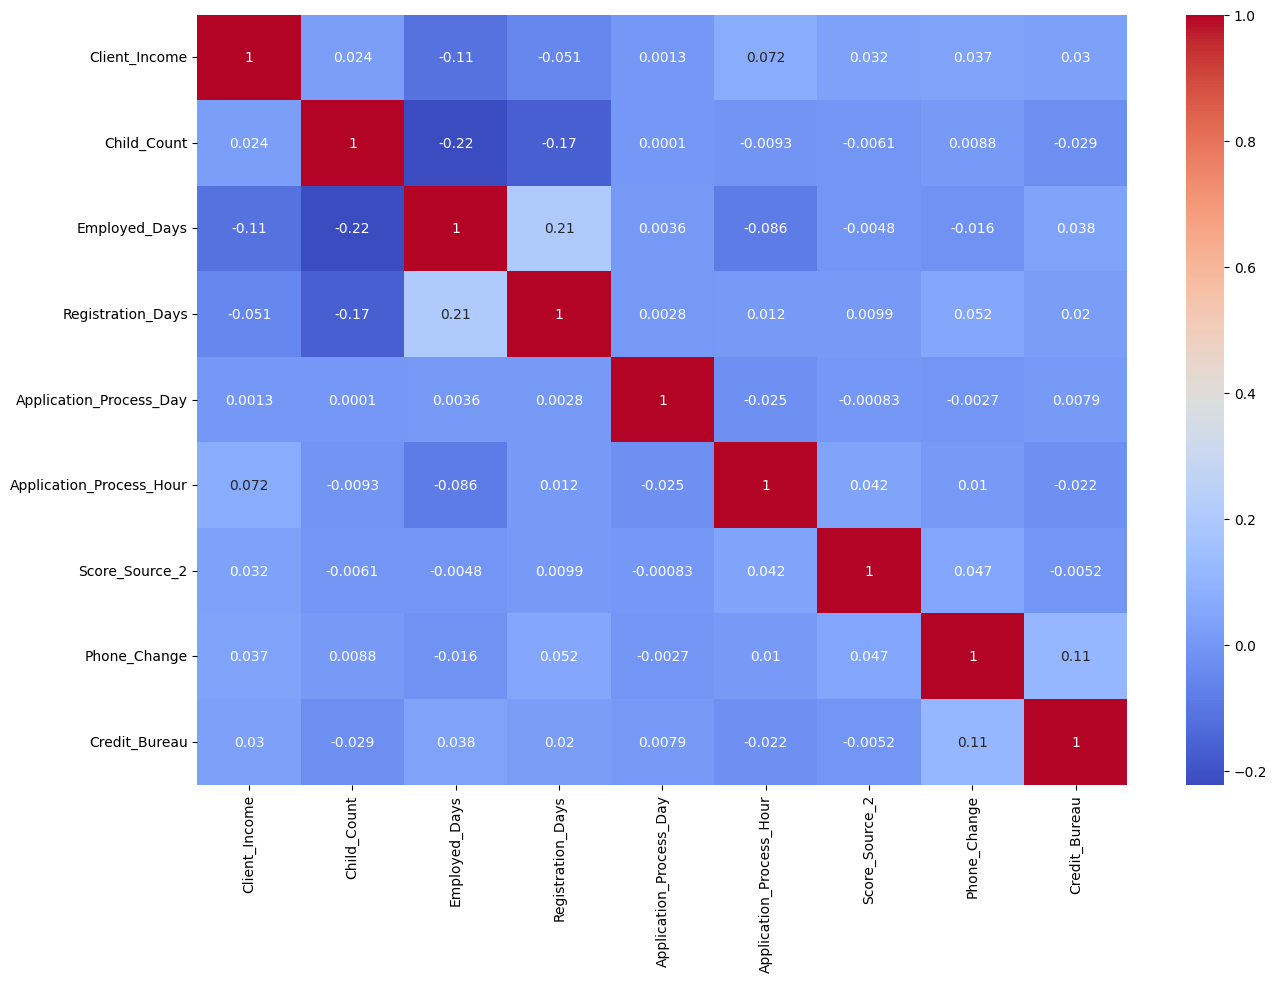

In [100]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [101]:
df.select_dtypes(include='object').columns

Index(['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Client_Education', 'Client_Marital_Status', 'Client_Gender',
       'Loan_Contract_Type', 'Client_Housing_Type', 'Homephone_Tag',
       'Workphone_Working', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization', 'Default'],
      dtype='object')

In [102]:
# Numerica
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
print(numerical_columns.columns)

Index(['Client_Income', 'Child_Count', 'Employed_Days', 'Registration_Days',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau'],
      dtype='object')
